In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

### Ввод и описание данных
Набор данных содержит 14 атрибутов, описывающих состояние пациента. Задача состоит в предсказании на основе имеющихся данных наличия сердечного заболевания.

In [2]:
# Подключаем google диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path = '/content/drive/MyDrive/data/heart.csv' # путь к данным на диске
data = pd.read_csv(path)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Описание переменных
* age - возраст пациента
* sex - пол: 1 - мужчина; 0 - женщина
* cp - тип боли в груди: 0 - типичная, 1 - асимптотическая, 2 - неангинальная, 3 - нетипичная
* trestbps - артериальное давление в состоянии покоя (при поступлении в больницу), мм рт. ст.
* chol - сывороточный холестерин в мг/дл
* fbs -  уровень сахара в крови натощак > 120 мг / дл (1 - правда; 0 - ложь)
* restecg - повторная ЭКГ: 0 - в норме, 1 - наличие аномалии зубца ST-T (инверсии зубца T и / или подъем или депрессия ST > 0,05 мВ), 2 - наличие вероятной или определенной гипертрофии левого желудочка
* thalach - максимальная частота сердечных сокращений
* exang - стенокардия, вызванная физической нагрузкой (1 - да; 0 - нет)
* oldpeak - депрессия сегмента ST, вызванная физической нагрузкой по сравнению с отдыхом
* slope - наклон сегмента ST при пиковой нагрузке: 0 - подъем, 1 - пологий, 2 - спуск
* ca - количество крупных сосудов, выделенных методом flourosopy (0 - 1)
* thal - 3 - нормально; 6 - исправленный дефект; 7 - обратимый дефект
* target - наличие/отсутствие сердечного заболевания (1 - да; 0 - нет)



In [6]:
# размер данных
data.shape

(303, 14)

In [7]:
# типы данных
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Все признаки являются числовыми, т.к. категориальные переменные уже были закодированы при составлении набора данных.

In [8]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропущенные значения отсутствуют.

In [20]:
data.groupby('target').size()

target
0    138
1    165
dtype: int64

Классы можно считать сбалансированными.

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Можно видеть разный масштаю признаков, вероятно, потребуется их нормализация.

### Scatterplots with targets

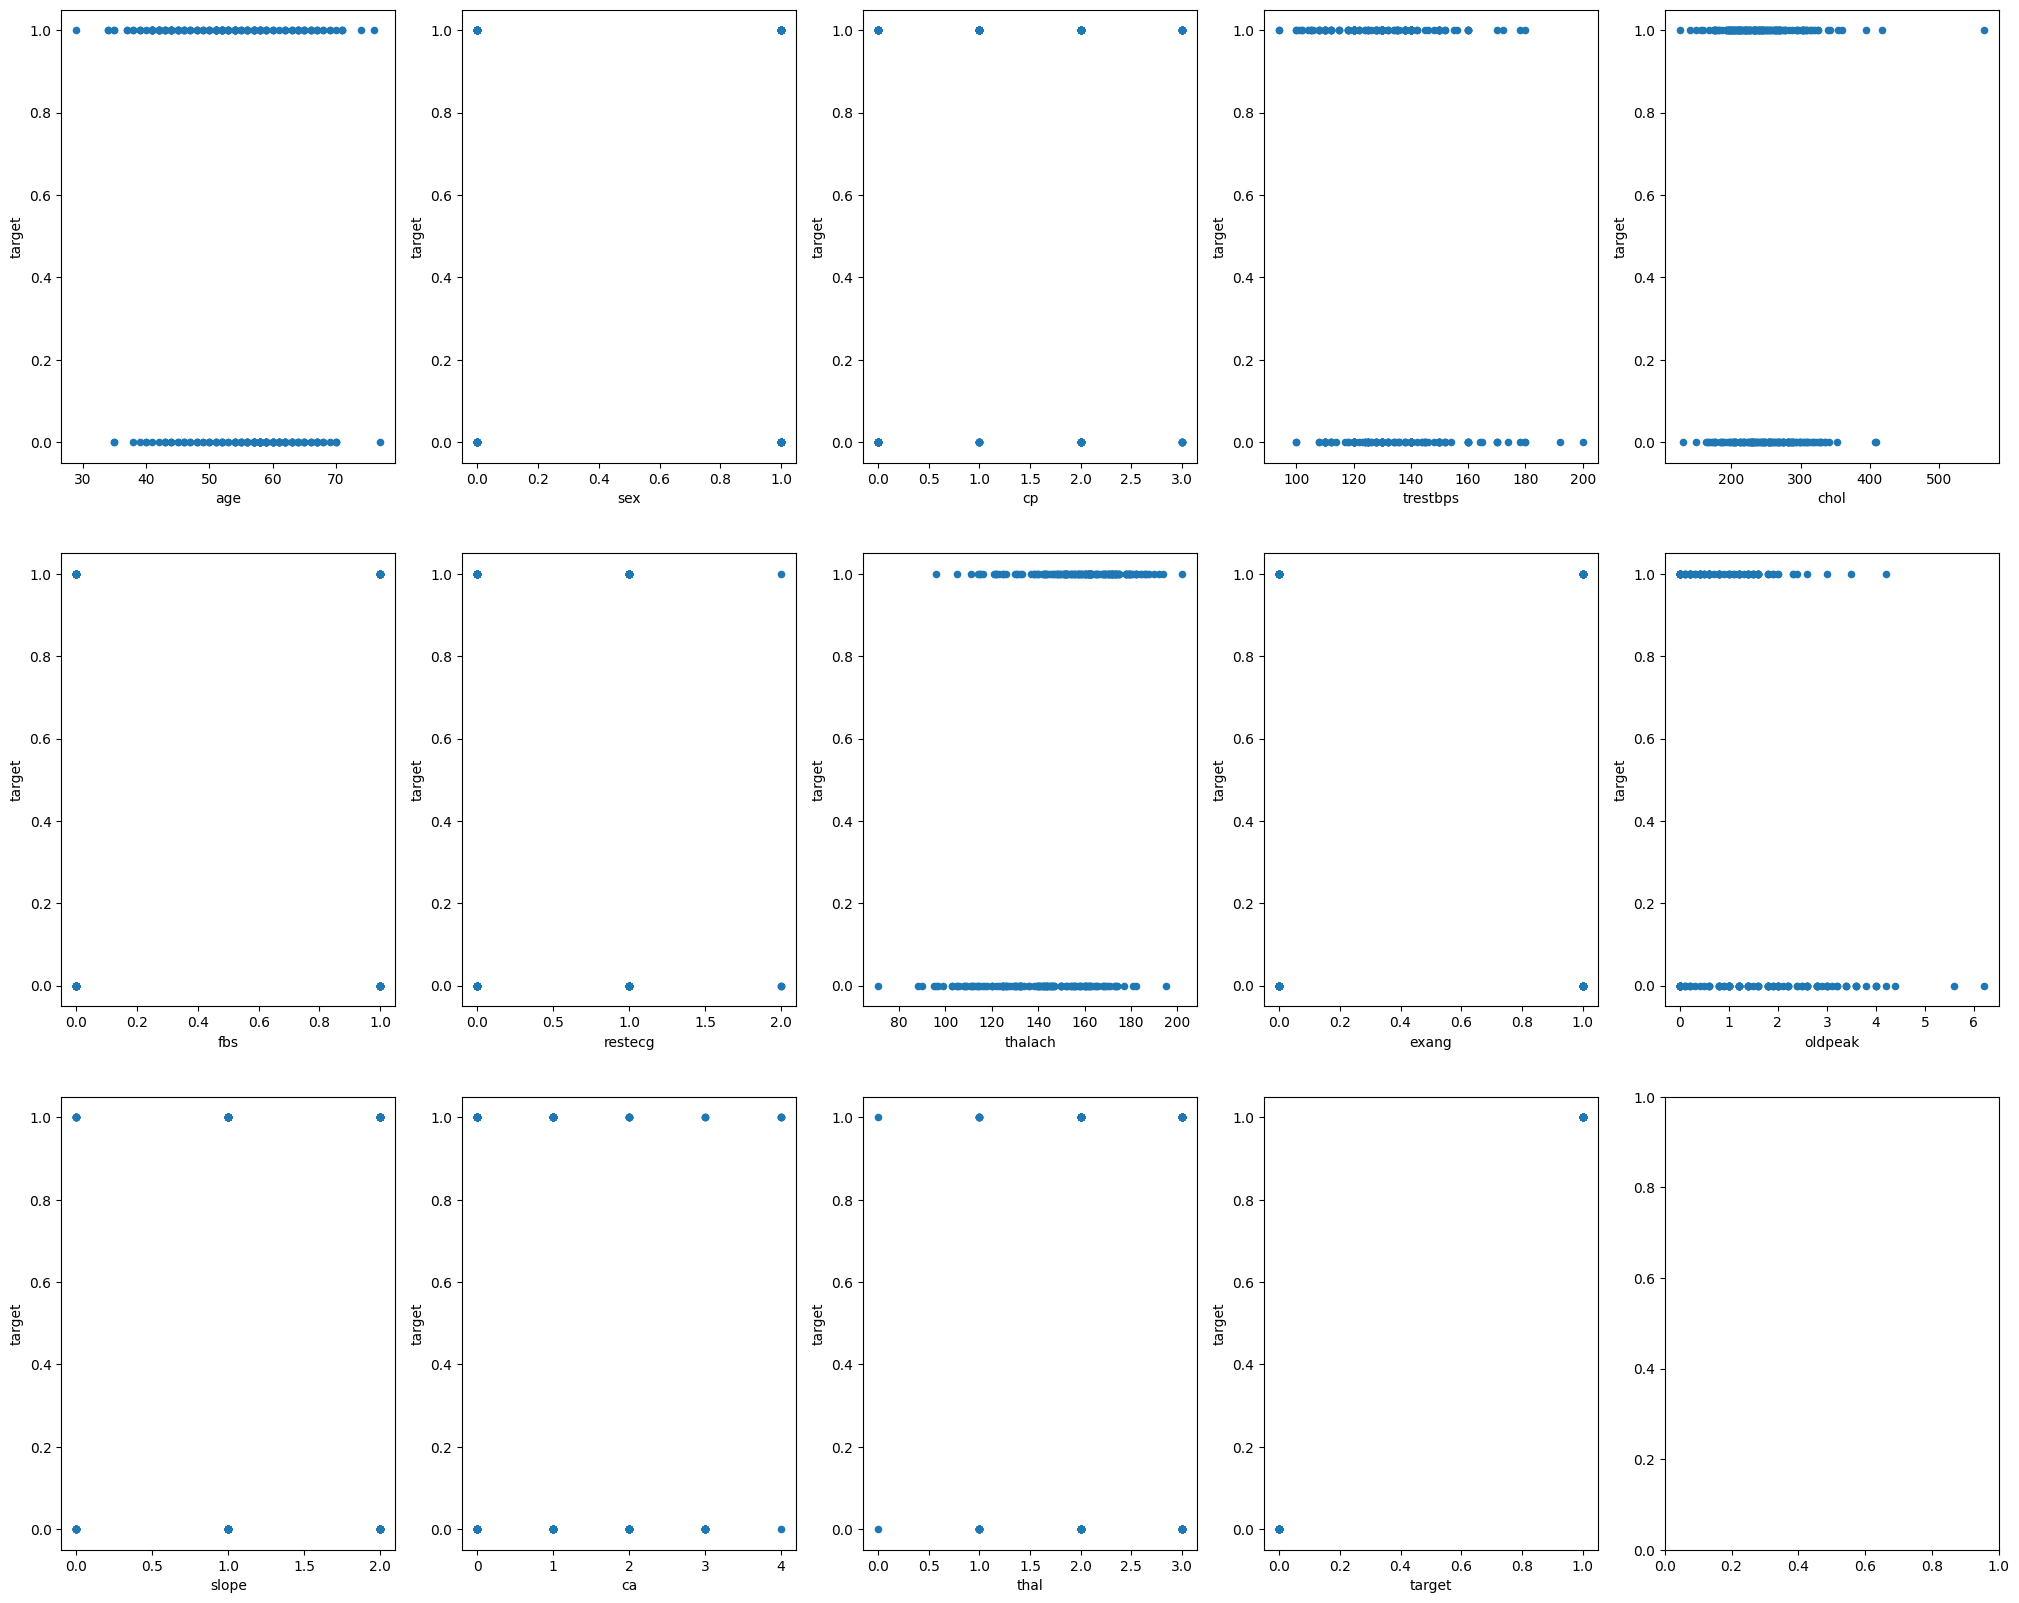

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(data.columns):
    data.plot(feature, "target", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

### Гистограммы распределения признаков

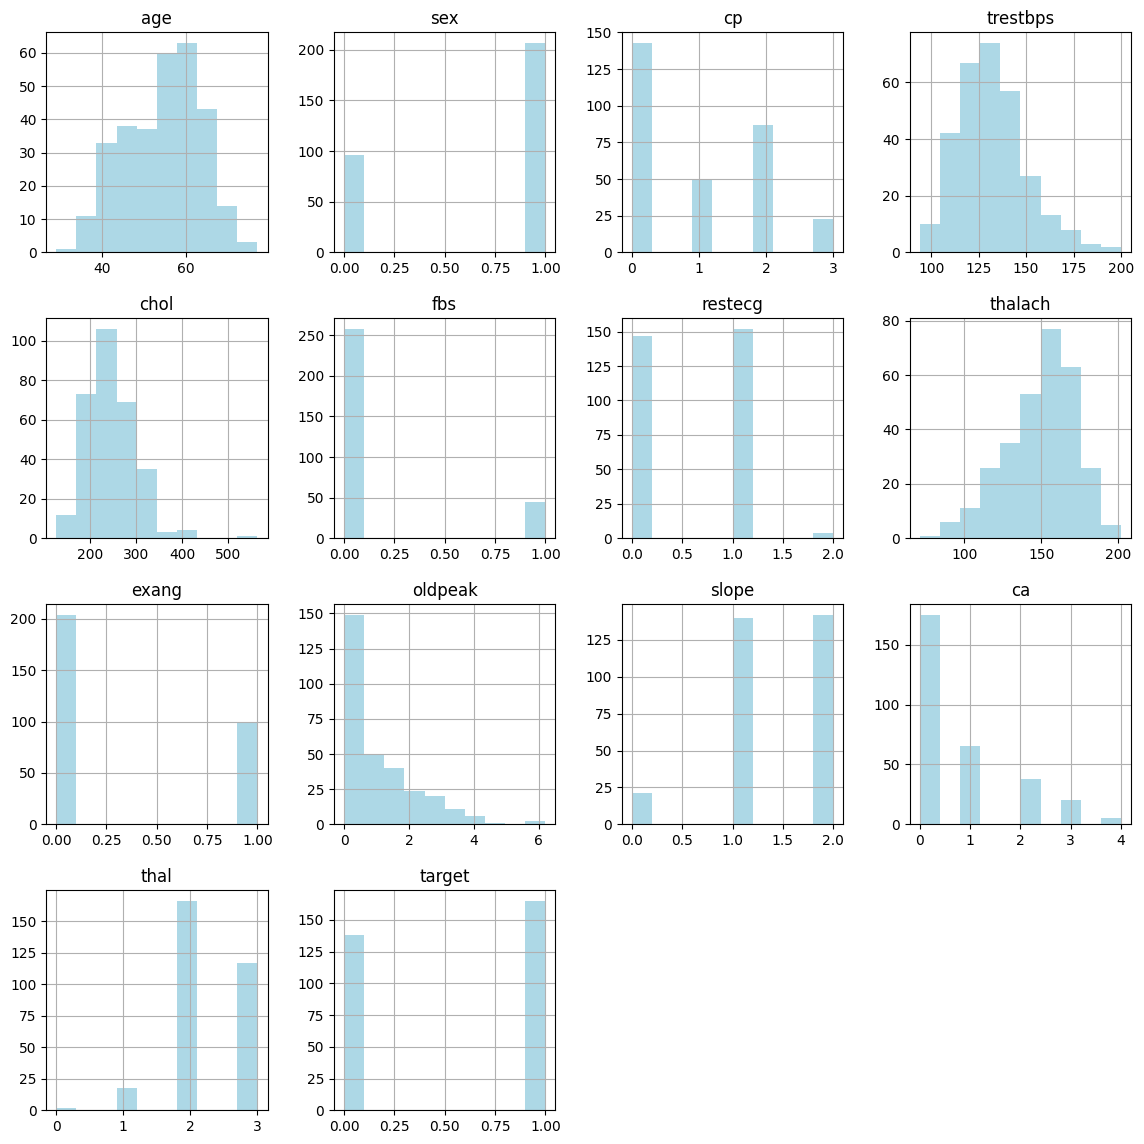

In [21]:
data.hist(figsize=(14,14) , color = 'lightblue')
plt.show()

### Выбросы

In [22]:
numeric_columns=['age','trestbps','chol','thalach','oldpeak']

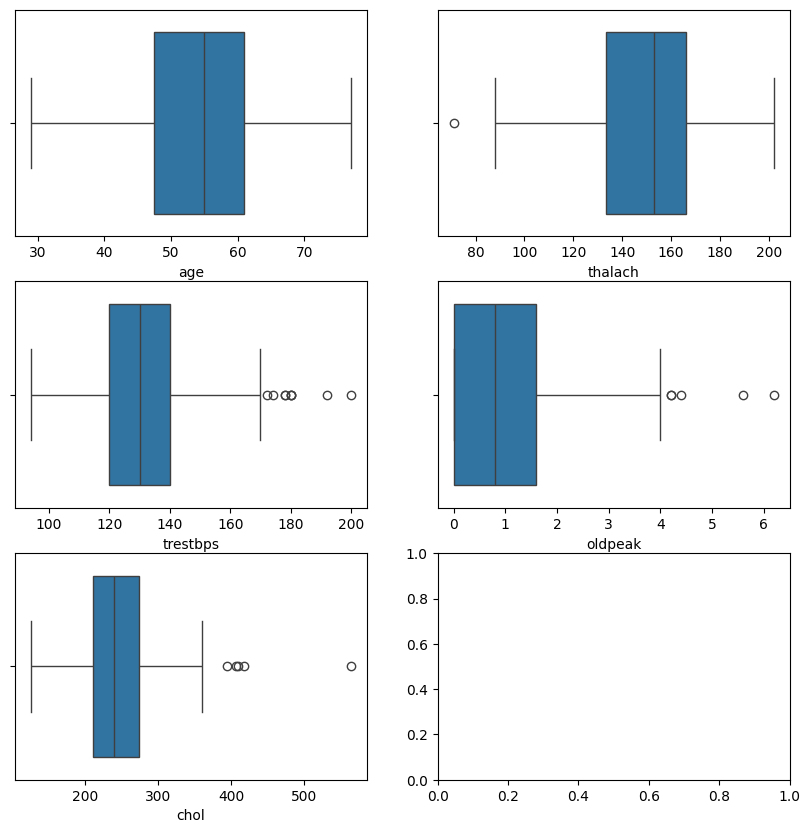

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
count = 0
for idx, feature in enumerate(numeric_columns):
    sns.boxplot(x=data[feature], ax=axes[count % 3, count // 3])
    count += 1

In [26]:
for col in numeric_columns:
    print(f'Outliers for {col} column: {boxplot_stats(data[col]).pop(0)["fliers"]}\n')

Outliers for age column: []

Outliers for trestbps column: [172 178 180 180 200 174 192 178 180]

Outliers for chol column: [417 564 394 407 409]

Outliers for thalach column: [71]

Outliers for oldpeak column: [4.2 6.2 5.6 4.2 4.4]



### Распределение числовых признаков

<Axes: xlabel='oldpeak', ylabel='Density'>

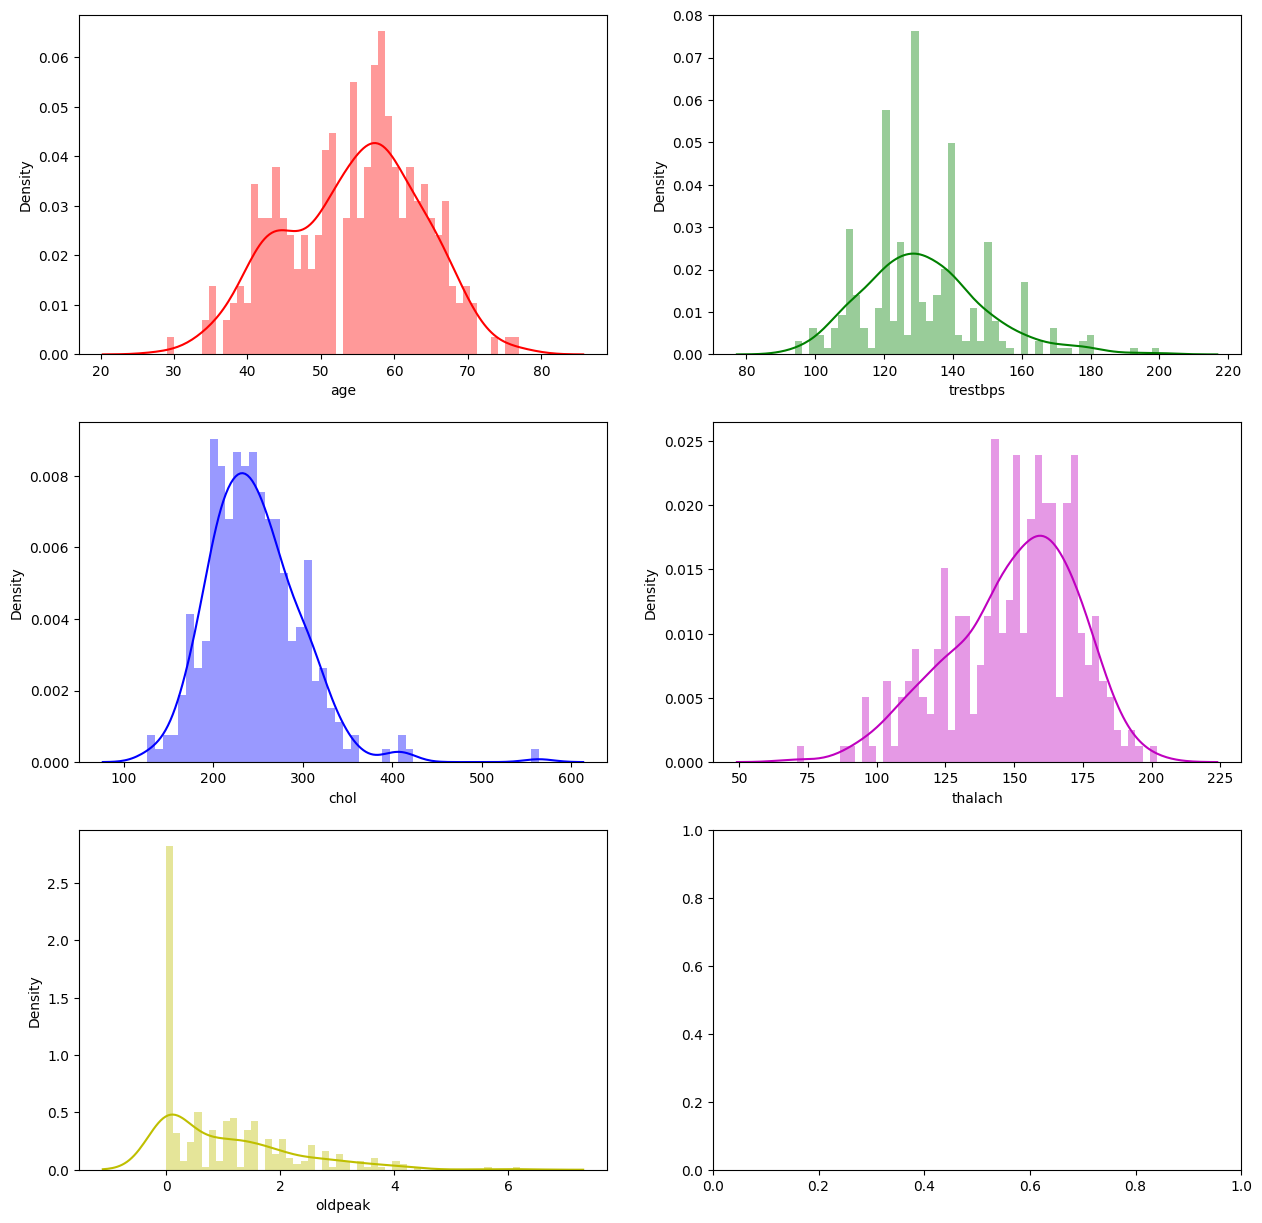

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(data['age'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(data['trestbps'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(data['chol'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(data['thalach'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.distplot(data['oldpeak'], bins=50, color='y', ax=axes[2, 0])

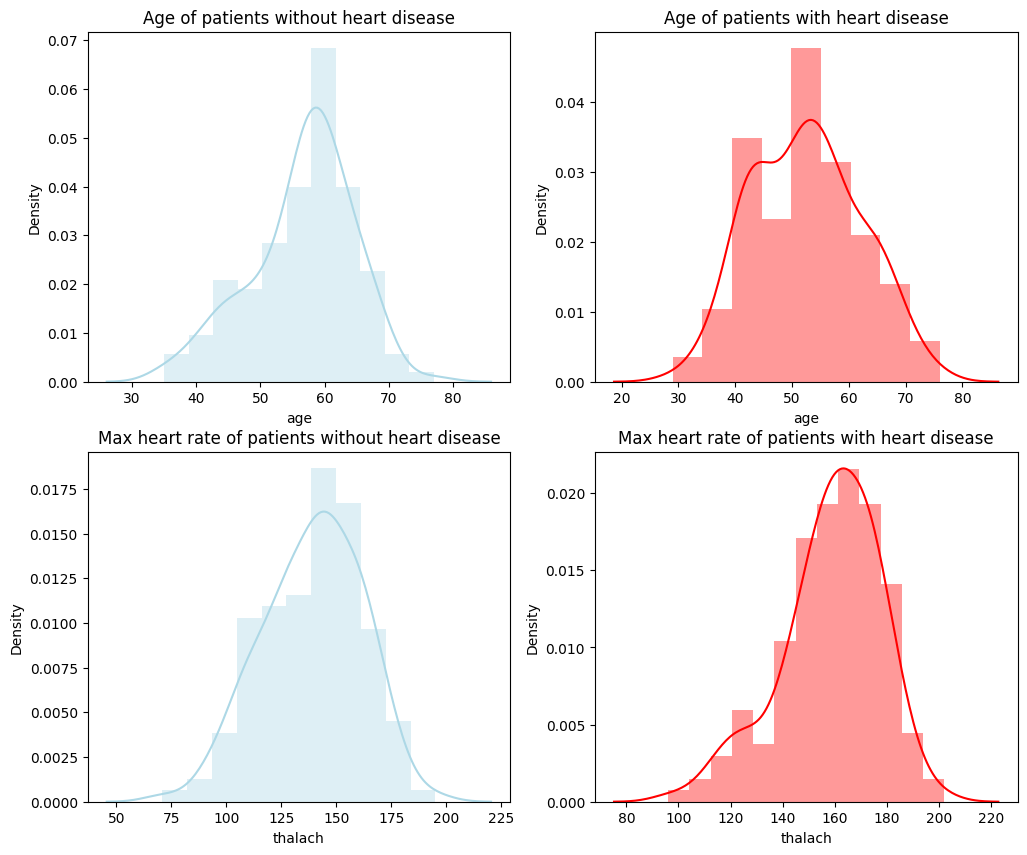

In [33]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(data[data['target']==0].age , color ='lightblue')
plt.title('Age of patients without heart disease')

plt.subplot(222)
sns.distplot(data[data['target']==1].age , color ='red')
plt.title('Age of patients with heart disease')

plt.subplot(223)
sns.distplot(data[data['target']==0].thalach, color ='lightblue' )
plt.title('Max heart rate of patients without heart disease')

plt.subplot(224)
sns.distplot(data[data['target']==1].thalach , color ='red')
plt.title('Max heart rate of patients with heart disease')
plt.show()

## Correlation matrix

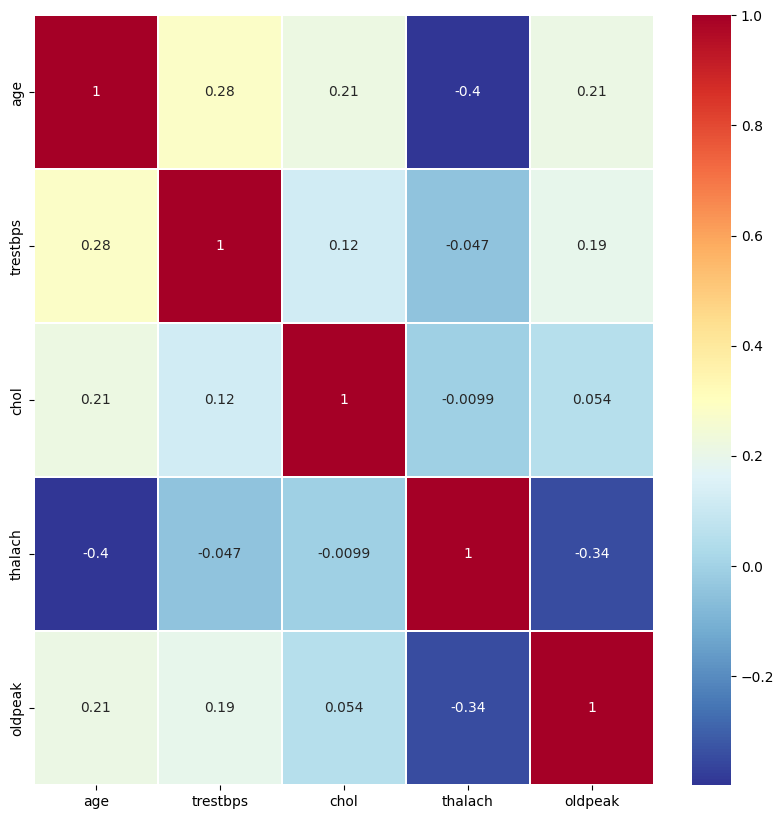

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(data[numeric_columns].corr(), cmap="RdYlBu_r", annot=True, linewidths=0.1);

Можно выделить довольно сильную обратную корреляцию между возрастом (age) и максимальной частотой сердечных сокращений (thalach), а также между максимальной частотой сердечных сокращений (thalach) и депрессией сегмента ST, вызванной физической нагрузкой (oldpeak).

Выделим целевую переменную.

In [39]:
X,y=data.loc[:,:'thal'],data.loc[:,'target']

In [40]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [41]:
X.shape

(303, 13)

In [42]:
y.shape

(303,)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
sc=StandardScaler().fit(X)
X_std=sc.transform(X)

In [47]:
X_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [48]:
X_std.shape

(303, 13)

Разделяем на обучающую и тестовую выборки

In [49]:
X_train_std,X_test_std,y_train,y_test=train_test_split(X_std,y,random_state=10,test_size=0.3,shuffle=True)

In [50]:
X_train_std.shape

(212, 13)

In [51]:
X_test_std.shape

(91, 13)

В качестве базовой модели используем дерево решений.

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt=DecisionTreeClassifier(max_features = None)

In [54]:
dt.fit(X_train_std,y_train)

DecisionTreeClassifier()

In [55]:
prediction=dt.predict(X_test_std)

In [56]:
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0])

Для задачи бинарной классификации при сбалансированности классов в качестве метрики качества можно использовать accuracy. Однако в задачах медицинской диагностики, поскольку важнее определить именно наличие сердечного заболевания (класс 1), в качестве метрики предпочтительнее использовать метрику recall, показывающую долю истинных положительных ответов, которые были определены моделью из общего числа положительных ответов.

In [57]:
from sklearn.metrics import accuracy_score, recall_score

In [60]:
accuracy_dt=accuracy_score(y_test,prediction)*100
accuracy_dt

76.92307692307693

In [61]:
recall_dt=recall_score(y_test,prediction)*100
recall_dt

87.8048780487805